A notebook to compare our obligate AlphaFold2 structures to our ColabFold structures.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [18]:
df = pd.read_csv('./project_pipeline/data/obligate_af_cf_compared.tsv', sep='\t')
df['2_comp'] = df['2_comp'].astype('float')
df.head()

,uniprot,cf_filename,complex_rmsd,1.0_aligned,1.0_comp,1.1_aligned,1.1_comp,1.2_aligned,1.2_comp,2.0_aligned,...,2.1_aligned,2.1_comp,2.2_aligned,2.2_comp,2.3_aligned,2.3_comp,1_aligned,1_comp,2_aligned,2_comp
0,P0AG30,P0AG30_229_unrelaxed_rank_001_alphafold2_multi...,19.431,0.617,1.418,0.0,0.0,0.0,0.0,1.264,...,0,0,0,0,0,0,0.617,1.418,1.264,0.932
1,P0AG30,P0AG30_019_unrelaxed_rank_001_alphafold2_multi...,21.483,0.982,22.824,0.0,0.0,0.0,0.0,7.838,...,0,0,0,0,0,0,0.982,22.824,7.838,31.503
2,P0AG30,P0AG30_054_unrelaxed_rank_001_alphafold2_multi...,22.966,0.974,15.631,0.0,0.0,0.0,0.0,14.037,...,0,0,0,0,0,0,0.974,15.631,14.037,10.410
3,P0AG30,P0AG30_095_unrelaxed_rank_001_alphafold2_multi...,26.336,0.847,3.263,0.0,0.0,0.0,0.0,2.887,...,0,0,0,0,0,0,0.847,3.263,2.887,3.001
4,P0AG30,P0AG30_303_unrelaxed_rank_001_alphafold2_multi...,14.633,0.535,1.198,0.0,0.0,0.0,0.0,0.828,...,0,0,0,0,0,0,0.535,1.198,0.828,1.093


In [37]:
medians = df.groupby(['uniprot'])['2_comp'].median().values
nobs = df['uniprot'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]

print(df['uniprot'].value_counts())
print(df.groupby(['uniprot'])['2_comp'].median())

P23687    397
P0AG30    335
P04807    248
Q7KLV9    119
O60729     59
H2E7Q8     20
O69275     17
P04958     11
Name: uniprot, dtype: int64
uniprot
H2E7Q8     2.430
O60729     4.140
O69275     8.243
P04807     8.184
P04958     3.466
P0AG30     1.648
P23687    10.247
Q7KLV9    25.149
Name: 2_comp, dtype: float64


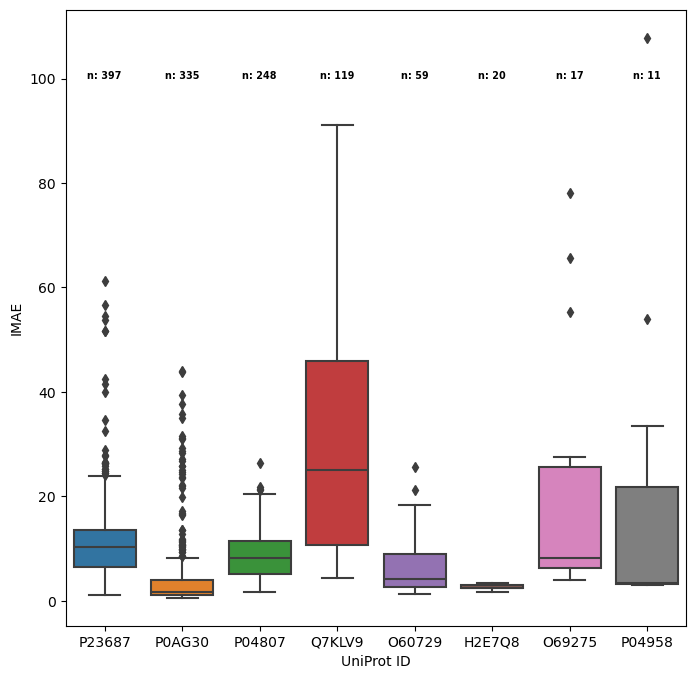

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.boxplot(data=df, x='uniprot', y='2_comp', ax=ax, order=df['uniprot'].value_counts().index)
ax.set_xlabel('UniProt ID')
ax.set_ylabel('IMAE')

pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
    ax.text(pos[tick], 100, nobs[tick],
            horizontalalignment='center', 
            size='x-small', 
            color='black', 
            weight='semibold')
    
plt.savefig('./project_pipeline/data/figures/obligate_af_cf_compared.png', dpi=300)
plt.show()